In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

c:\Users\mape3\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)


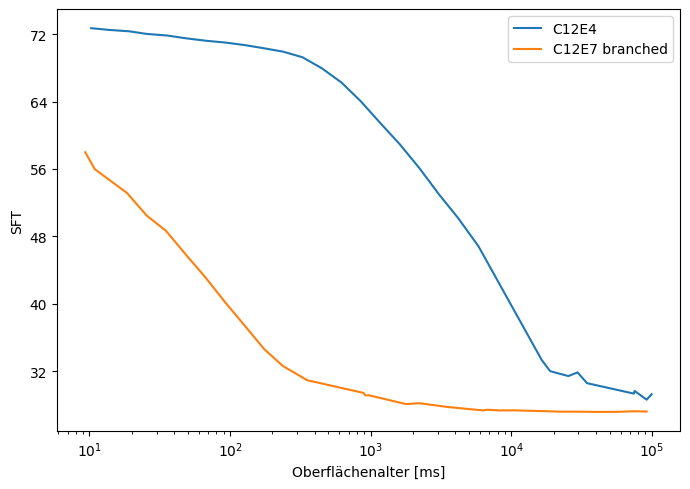

In [2]:
df=pd.read_csv("Example Data/C12E4_0.1g.txt", delimiter="\t", header=1, skiprows=[2])
age=df["Oberflächenalter [ms].10"]
sft=df["SFT"]
df1=pd.read_csv("Example Data/C12E7_branched_0.1gL.txt", delimiter="\t", header=1, skiprows=[2])
age1=df1["Oberflächenalter [ms].10"]
sft1=df1["SFT"]

def to_float(series):
    return pd.to_numeric(series.str.replace(',', '.', regex=False), errors='coerce')

# Prepare and sort first dataset
age_num_clean = to_float(age)
sft_num_clean = to_float(sft)
sorted_idx = np.argsort(age_num_clean)
age_num_sorted = age_num_clean.iloc[sorted_idx].reset_index(drop=True)
sft_num_sorted = sft_num_clean.iloc[sorted_idx].reset_index(drop=True)

# Prepare and sort second dataset
age_num1_clean = to_float(age1)
sft_num1_clean = to_float(sft1)
sorted_idx1 = np.argsort(age_num1_clean)
age_num1_sorted = age_num1_clean.iloc[sorted_idx1].reset_index(drop=True)
sft_num1_sorted = sft_num1_clean.iloc[sorted_idx1].reset_index(drop=True)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(age_num_sorted, sft_num_sorted, label='C12E4')
ax.plot(age_num1_sorted, sft_num1_sorted, label='C12E7 branched')

ax.set_xscale("log")
ax.set_xlabel("Oberflächenalter [ms]")
ax.set_ylabel("SFT")
ax.legend()

# Reduce number of ticks
#ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.yaxis.set_major_locator(plt.MaxNLocator(8))

plt.tight_layout()
plt.show()


c:\Users\mape3\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)


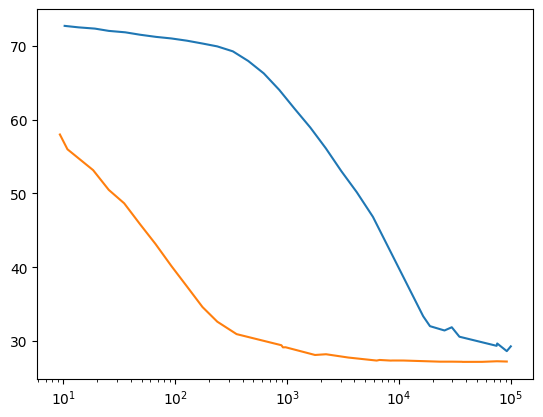

In [10]:
def read_data(file_path, delimiter="\t", header=1, skiprows=[2]):
    df = pd.read_csv(file_path, delimiter=delimiter, header=header, skiprows=skiprows)
    # Select the second last and last columns for age and sft
    age = df.iloc[:, -2]
    sft = df.iloc[:, -1]
    age_num_clean = to_float(age)
    sft_num_clean = to_float(sft)
    sorted_idx = np.argsort(age_num_clean)
    age_num_sorted = age_num_clean.iloc[sorted_idx].reset_index(drop=True)
    sft_num_sorted = sft_num_clean.iloc[sorted_idx].reset_index(drop=True)
    return age_num_sorted, sft_num_sorted

age, sft = read_data("Example Data/C12E4_0.1g.txt")
age1, sft1 = read_data("Example Data/C12E7_branched_0.1gL.txt")
plt.plot(age, sft, label='C12E4')
plt.plot(age1, sft1, label='C12E7 branched')
plt.xscale("log")

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\mape3\AppData\Local\Temp\ipykernel_29960\29360836.py:1: SyntaxWarning: invalid escape sequence '\C'
  cal=pd.read_csv("Example Data\Calibration.txt", delimiter="\t", header=1, skiprows=[2])


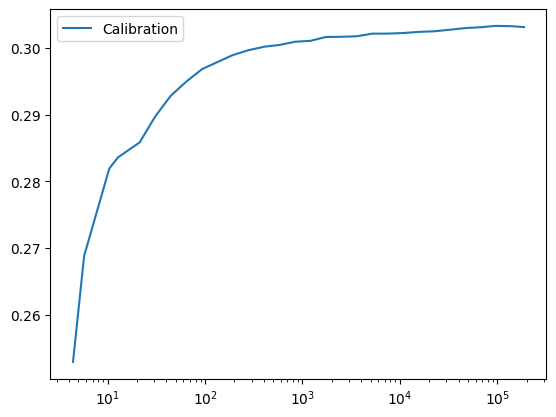

In [ ]:
cal=pd.read_csv("Example Data\Calibration.txt", delimiter="\t", header=1, skiprows=[2])
life=np.array(cal["bubble life time[ms]"])
sft_cal=np.array(cal["SFT"])

plt.plot(life, sft_cal, label='Calibration')
plt.xscale("log")
plt.legend()
plt.show()



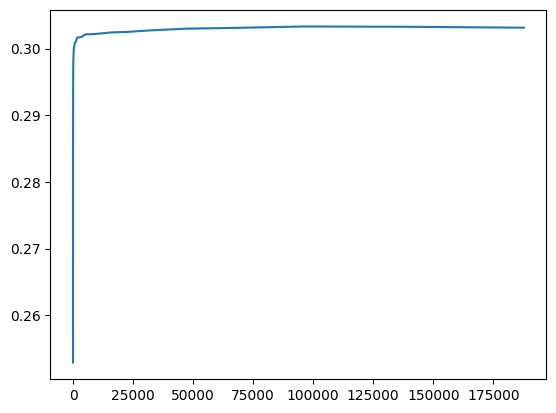

In [28]:
def read_calibration(file_path, delimiter="\t", header=1, skiprows=[2]):
    df = pd.read_csv(file_path, delimiter=delimiter, header=header, skiprows=skiprows)
    life = np.array(df.iloc[:, 0])  # Second column
    sft_cal = np.array(df.iloc[:, 1])  # First column
    return life, sft_cal

life, sft_cal = read_calibration("Example Data/Calibration.txt")
plt.plot(life, sft_cal, label='Calibration')

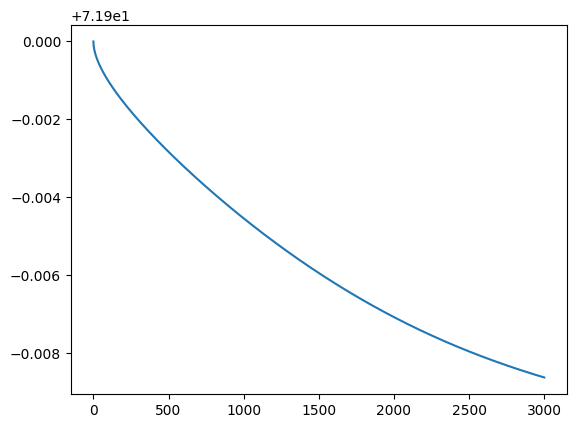

In [13]:
simdata=pd.read_csv("Yang Simulation mymolar.tsv", delimiter="\t")
plt.plot(simdata["time_s"], simdata["dynamic_surface_tension_N_m"], label='Simulation')
#plt.xscale("log")